In [ ]:
# verify version
#!python --version
#!pip install --upgrade luxai_s2
#!pip install importlib-metadata==4.13.0
#!pip install --upgrade moviepy # needed to render videos of episodes

In [157]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np

In [158]:
np.set_printoptions(threshold=np.inf) #para ver toda la matriz

In [169]:
env = LuxAI_S2() # create the environment object
obs = env.reset(seed=1) # resets an environment with a seed

In [170]:
#return the "Manhattan distance"
from scipy.ndimage import distance_transform_cdt

def manhattan_distance(binary_mask):
    # Get the distance map from every pixel to the nearest positive pixel
    distance_map = distance_transform_cdt(binary_mask, metric='taxicab')

    return distance_map

In [171]:
#search where is the ice and where is the ore in the map
ice = obs["player_0"]["board"]["ice"]
ore = obs["player_0"]["board"]["ore"]
rubble = obs["player_0"]["board"]["rubble"]

mapa = env.render("rgb_array", width=48, height=48).transpose(1,0,2) # not sure why he use this tipe of transpose
# explanation I found on Github OpenCV img = cv2.imread(path) loads an image with HWC-layout (height, width, channels), while Pytorch requires CHW-layout. So we have to do np.transpose(image,(2,0,1)) for HWC->CHW transformation.


In [175]:
csv_filename = '/Users/oceguerac/Downloads/ice.csv'

ice = np.loadtxt(csv_filename, delimiter=',')
ice[:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [176]:
type(ice)

numpy.ndarray

In [168]:
ice

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       

In [172]:
# Lets do the same but to find places with more than 1 ice or ore

from scipy.spatial import KDTree

def manhattan_dist_to_nth_closest(arr, n):
    if n == 1:
        distance_map = distance_transform_cdt(1-arr, metric='taxicab')
        return distance_map
    else:
        true_coords = np.transpose(np.nonzero(arr)) # get the coordinates of true values
        tree = KDTree(true_coords) # build a KDTree
        dist, _ = tree.query(np.transpose(np.nonzero(~arr)), k=n, p=1) # query the nearest to nth closest distances using p=1 for Manhattan distance
        return np.reshape(dist[:, n-1], arr.shape) # reshape the result to match the input shape and add an extra dimension for the different closest distances

In [191]:
#ice_size = len(ice[ice==1]) # con esto encuentro cuantos hielos hay en el mapa para calcular la manhattan distance para todos los hielos 
#a = np.where(ice==1)
ice_size=2
print(ice_size)


2


In [193]:
ice_distances = [manhattan_dist_to_nth_closest(ice, i) for i in range(1,ice_size)] #the (1,8) look for positions nearest to i ices
ice_distances[0]

array([[18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  9, 10, 11, 12, 13, 14,
        15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
       [17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  8,  9, 10, 11, 12, 13,
        14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
       [16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  7,  8,  9, 10, 11, 12,
        13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
       [15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
       [14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 

IndexError: list index out of range

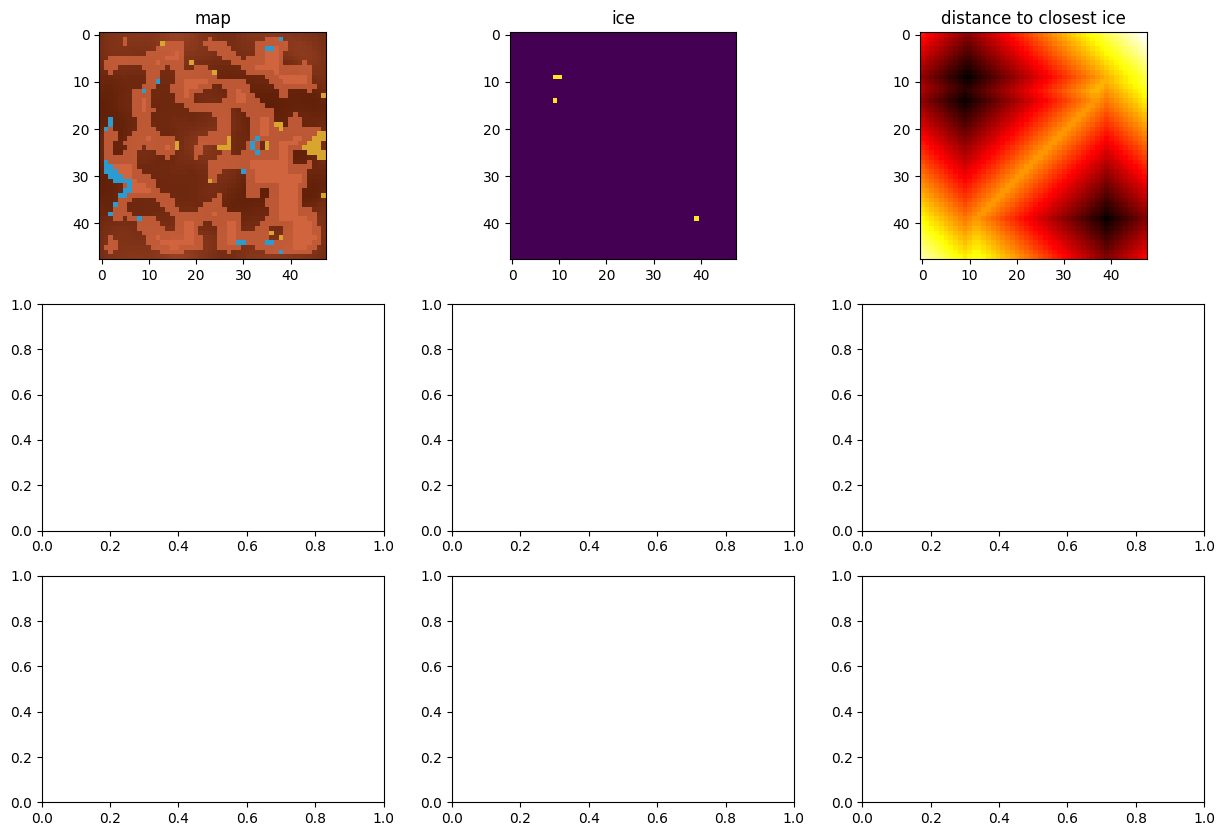

In [194]:
# this is the distance to the n-th closest ice, for each coordinate
ice_distances = [manhattan_dist_to_nth_closest(ice, i) for i in range(1,ice_size)] #the (1,8) look for positions nearest to i ices
#in an ideal work we should search for the "best position" so increase the number until the conditions start to get bad

# this is the distance to the n-th closest ore, for each coordinate
ore_distances = [manhattan_dist_to_nth_closest(ore, i) for i in range(1,ice_size)]

len(ice_distances)

#se puede eliminar toda la parte de abajo que es solo para visualizacion!!

#print(ice_distances)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs[0, 0].imshow(mapa)
axs[0, 0].set_title('map')
axs[0, 1].imshow(ice)
axs[0, 1].set_title('ice')
axs[0, 2].imshow(ice_distances[0], cmap='hot')
axs[0, 2].set_title('distance to closest ice')
axs[1, 0].imshow(ice_distances[1], cmap='hot')
axs[1, 0].set_title('distance to 2nd closest ice')
axs[1, 1].imshow(ice_distances[2], cmap='hot')
axs[1, 1].set_title('distance to 3rd closest ice')
axs[1, 2].imshow(ice_distances[4], cmap='hot')
axs[1, 2].set_title('distance to 5th closest ice')
axs[2, 0].imshow(ore_distances[0], cmap='hot')
axs[2, 0].set_title('distance to closest ore')
axs[2, 1].imshow(ore_distances[1], cmap='hot')
axs[2, 1].set_title('distance to 2th closest ore')
axs[2, 2].imshow(ore_distances[4], cmap='hot')
axs[2, 2].set_title('distance to 5th closest ore')

In [341]:
size1= len(ice_distances)
res_ice = []
res_ore = []
for x in range(size1):
    res_ice.append((sum(sum(ice_distances[x]))))
    res_ore.append((sum(sum(ore_distances[x]))))

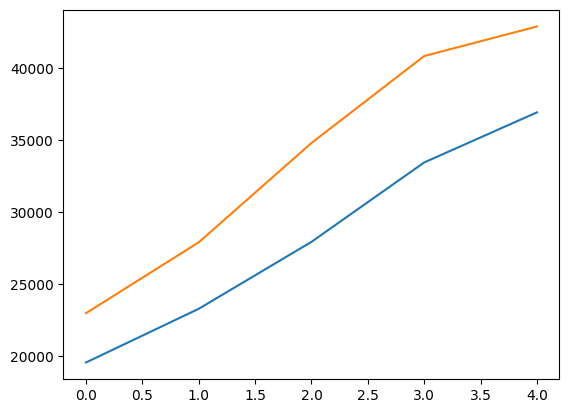

In [342]:
plt.plot(res_ice)
plt.plot(res_ore)


In [343]:
a=1/len(ice_distances)
b=0
secuencia = []
for i in range(len(ice_distances)):
 b=b+a
 secuencia.append(b)

Weights = secuencia[::-1]
print(Weights)

ICE_WEIGHTS = np.array(Weights) # tenemos que usar len(ice_distances) para asignar el peso, podriamos simplemente repetir 0.25 n veces para aumentar el peso de esos sitios


[1.0, 0.8, 0.6000000000000001, 0.4, 0.2]


In [344]:
ICE_WEIGHTS = np.array(Weights) # tenemos que usar len(ice_distances) para asignar el peso, podriamos simplemente repetir 0.25 n veces para aumentar el peso de esos sitios
weigthed_ice_dist = np.sum(np.array(ice_distances) * ICE_WEIGHTS[:, np.newaxis, np.newaxis], axis=0)


ORE_WEIGHTS = np.array(Weights)
weigthed_ore_dist = np.sum(np.array(ore_distances) * ORE_WEIGHTS[:, np.newaxis, np.newaxis], axis=0)

ICE_PREFERENCE = 6 # if you want to make ore more important, change to 0.3 for example

combined_resource_score = (weigthed_ice_dist * ICE_PREFERENCE + weigthed_ore_dist)
       

In [346]:
size = len(Weights)
res_weigthed_ice_dist = []
for x in range(size):
    weigthed_ice_dist = np.sum(np.array(ice_distances) * ICE_WEIGHTS[:, np.newaxis, np.newaxis], axis=0)
    res_weigthed_ice_dist.append(weigthed_ice_dist)
    ICE_WEIGHTS = ICE_WEIGHTS[:-1]
    ice_distances = ice_distances[:-1]
    
res_weigthed_ore_dist = []
for x in range(size):
    weigthed_ore_dist = np.sum(np.array(ore_distances) * ORE_WEIGHTS[:, np.newaxis, np.newaxis], axis=0)
    res_weigthed_ore_dist.append(weigthed_ore_dist)
    ORE_WEIGHTS = ORE_WEIGHTS[:-1]
    ore_distances = ore_distances[:-1]
#len(combined_resource_score)

res_weigthed_ice_dist = res_weigthed_ice_dist[::-1]
res_weigthed_ore_dist = res_weigthed_ore_dist[::-1]


In [347]:
size= len(res_weigthed_ice_dist)
a_ice_dist = []
a_ore_dist = []
for x in range(size1):
    a_ice_dist.append((sum(sum(res_weigthed_ice_dist[x]))))
    a_ore_dist.append((sum(sum(res_weigthed_ore_dist[x]))))
    

#print(np.unravel_index(best_loc, (48, 48)))

4
4


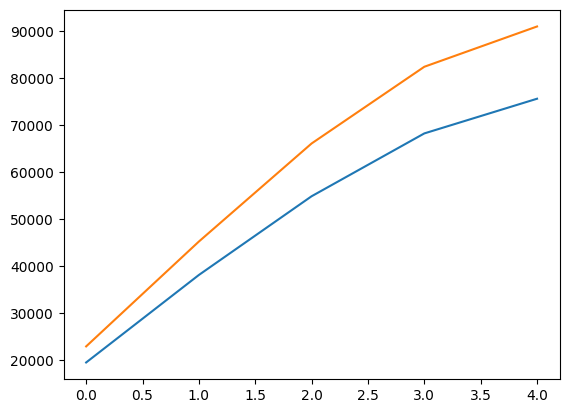

In [348]:
plt.plot(a_ice_dist)
plt.plot(a_ore_dist)
max_ice = np.nanargmax(np.where(a_ice_dist != 0, a_ice_dist, np.nan))
max_ore = np.nanargmax(np.where(a_ore_dist != 0, a_ore_dist, np.nan))
print(max_ice)
print(max_ore)

In [349]:
#me quedo con los arrays que tienen mayor valor para ambos recursos
best_ice_dist = res_weigthed_ice_dist[max_ice-1]
best_ore_dist = res_weigthed_ore_dist[max_ore-1]

In [350]:
#hago la combinacion de ambos
combined_resource_score = (best_ice_dist * ICE_PREFERENCE + best_ore_dist)
print(combined_resource_score)

[[416.6 397.  379.8 377.  369.4 361.8 354.2 346.6 339.  331.4 334.6 334.2
  326.6 328.6 332.6 336.6 340.6 345.4 349.  343.8 340.6 332.6 321.2 309.4
  297.4 287.4 277.4 267.4 258.2 246.6 232.6 218.2 203.4 188.6 178.4 167.
  164.2 167.6 172.2 191.  208.8 226.4 244.  260.6 274.6 289.  303.6 319.4]
 [397.  377.4 360.2 357.4 349.8 342.2 334.6 327.  319.4 311.8 315.  314.6
  307.  309.  313.  317.  321.  325.8 329.4 324.2 321.  313.  301.6 289.8
  277.8 267.8 257.8 247.8 238.6 227.  213.  198.6 183.8 169.  158.8 147.4
  144.6 148.  152.6 171.4 189.2 206.8 224.4 241.  255.  269.4 284.  299.8]
 [377.4 357.8 340.6 337.8 330.2 322.6 315.  307.4 299.8 292.2 295.4 295.
  287.4 289.4 293.4 297.4 301.4 306.2 309.8 309.4 306.2 299.4 289.2 277.4
  265.4 255.4 245.4 235.4 226.2 214.6 200.6 186.2 171.4 156.6 146.4 135.
  133.4 140.4 145.  163.8 181.6 199.2 216.8 233.4 247.4 261.8 276.4 292.2]
 [359.8 340.2 323.  320.2 312.6 305.  297.4 289.8 282.2 274.6 277.8 277.4
  269.8 271.8 275.8 279.8 283.8 288.6 

best starting location according to weighted distances to ore and ice is (23, 30)


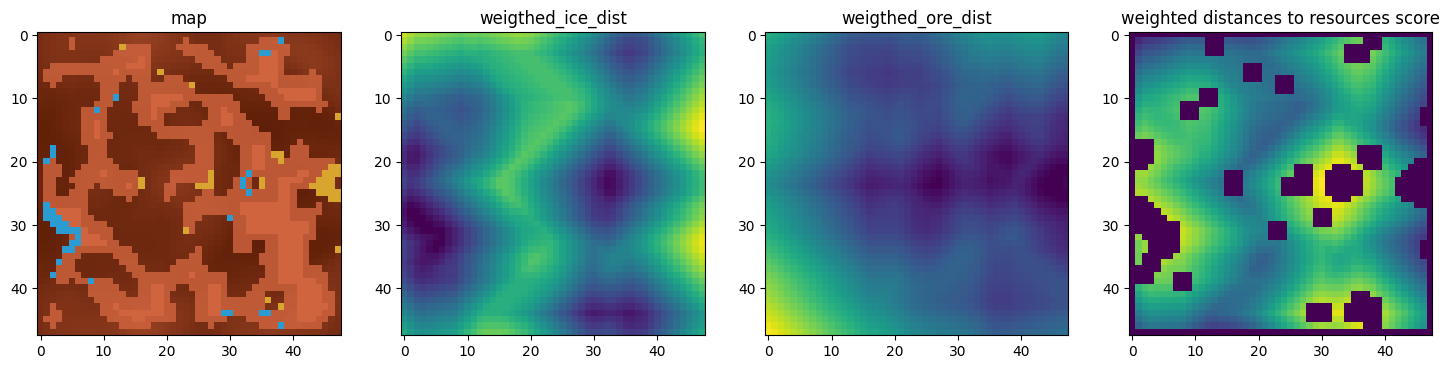

In [351]:
#esta multiplicacion convierte a los sitios que no son validos para poner una fabrica en 0  
combined_resource_score = (np.max(combined_resource_score) - combined_resource_score) * obs["player_0"]["board"]["valid_spawns_mask"]


best_loc = np.argmax(combined_resource_score)
x, y = np.unravel_index(best_loc, (48, 48))
print(f"best starting location according to weighted distances to ore and ice is {(x, y)}")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 5))

im1 = ax1.imshow(mapa)
ax1.set_title('map')

im2 = ax2.imshow(best_ice_dist)
ax2.set_title('weigthed_ice_dist')

im3 = ax3.imshow(best_ore_dist)
ax3.set_title('weigthed_ore_dist')

im4 = ax4.imshow(combined_resource_score)
ax4.set_title('weighted distances to resources score')

plt.show()  

<Figure size 960x720 with 0 Axes>

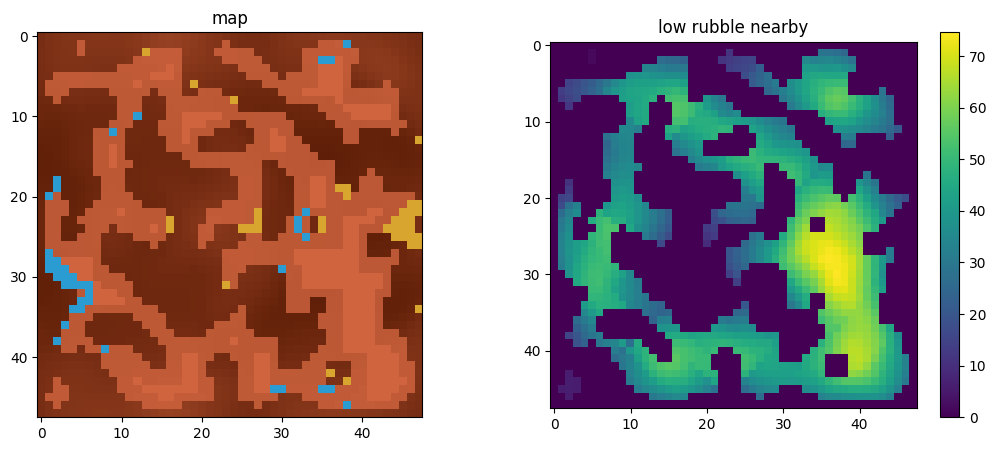

In [352]:
low_rubble = (rubble<25) # parece ser que esto es de 0 a 100

def count_region_cells(array, start, min_dist=2, max_dist=np.inf, exponent=1):
    
    def dfs(array, loc):
        distance_from_start = abs(loc[0]-start[0]) + abs(loc[1]-start[1])
        if not (0<=loc[0]<array.shape[0] and 0<=loc[1]<array.shape[1]):   # check to see if we're still inside the map
            return 0
        if (not array[loc]) or visited[loc]:     # we're only interested in low rubble, not visited yet cells
            return 0
        if not (min_dist <= distance_from_start <= max_dist):      
            return 0
        
        visited[loc] = True

        count = 1.0 * exponent**distance_from_start
        count += dfs(array, (loc[0]-1, loc[1]))
        count += dfs(array, (loc[0]+1, loc[1]))
        count += dfs(array, (loc[0], loc[1]-1))
        count += dfs(array, (loc[0], loc[1]+1))

        return count

    visited = np.zeros_like(array, dtype=bool)
    return dfs(array, start)

low_rubble_scores = np.zeros_like(low_rubble, dtype=float)

for i in range(low_rubble.shape[0]):
    for j in range(low_rubble.shape[1]):
        low_rubble_scores[i,j] = count_region_cells(low_rubble, (i,j), min_dist=0, max_dist=8, exponent=0.9)



plt.figure(dpi=150)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

im1 = ax1.imshow(mapa)
ax1.set_title('map')

im2 = ax2.imshow(low_rubble_scores)
ax2.set_title('low rubble nearby')
fig.colorbar(im2, ax=ax2)

best starting location according to the combined resource and rubble metrics is (27, 33)


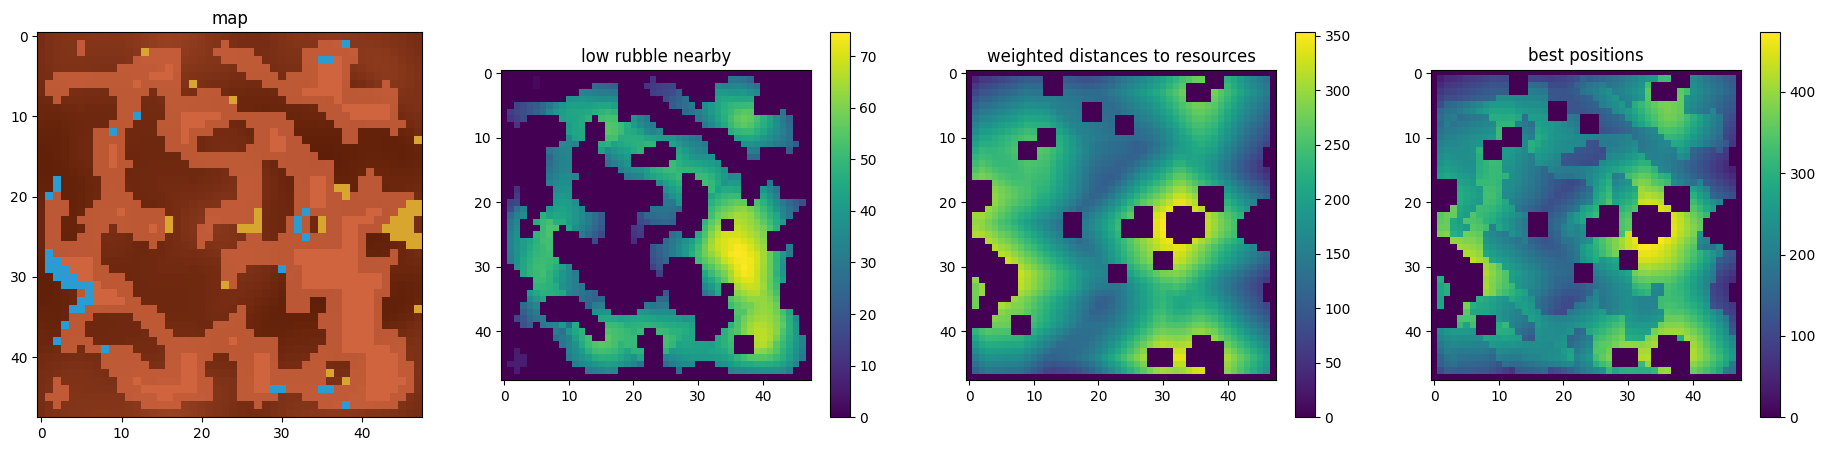

In [354]:
#Overal best place 
overall_score = (low_rubble_scores*2 + combined_resource_score ) * obs["player_0"]["board"]["valid_spawns_mask"]

best_loc = np.argmax(overall_score)
x, y = np.unravel_index(best_loc, (48, 48)) # esta es la mejor posicion segun este algoritmo
print(f"best starting location according to the combined resource and rubble metrics is {(x, y)}")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(23, 5))

im1 = ax1.imshow(mapa)
ax1.set_title('map')

im2 = ax2.imshow(low_rubble_scores)
ax2.set_title('low rubble nearby')
fig.colorbar(im2, ax=ax2)

im3 = ax3.imshow(combined_resource_score)
ax3.set_title('weighted distances to resources')
fig.colorbar(im3, ax=ax3)

im4 = ax4.imshow(overall_score)
ax4.set_title('best positions')
fig.colorbar(im4, ax=ax4)